# MNIST Handwritten Digit Classification Dataset

In [1]:
#import libraries in python 

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### dataset information
https://www.wikiwand.com/en/MNIST_database

In [2]:
# download dataset

(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# show 3rd sample of training data in matrics form

X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
# show size of 3rd sample

X_train[3].shape

(28, 28)

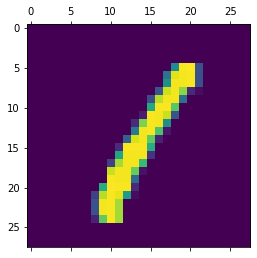

In [5]:
# show 3rd sample of training data in image form

plt.matshow(X_train[3])

In [6]:
# show label of 3rd trainig sample

y_train[3]

1

### we can observe that the digit is 1

In [7]:
# print total number of samples in training

y_train.shape

(60000,)

In [8]:
#show first 10 labels of training data

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
# shape of training data

X_train.shape

(60000, 28, 28)

In [10]:
# convert 28*28 to linear

X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [11]:
#new shape 

X_train_flat.shape

(60000, 784)

In [12]:
X_test_flat.shape

(10000, 784)

In [13]:
# creat a model

model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])

#compile model

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#train model

model.fit(X_train_flat,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 807us/step - loss: 2.3588 - accuracy: 0.2508
Epoch 2/5
1875/1875 [==============================] - 2s 804us/step - loss: 1.9589 - accuracy: 0.2968
Epoch 3/5
1875/1875 [==============================] - 2s 802us/step - loss: 1.9268 - accuracy: 0.3061
Epoch 4/5
1875/1875 [==============================] - 2s 809us/step - loss: 1.8956 - accuracy: 0.3162
Epoch 5/5
1875/1875 [==============================] - 2s 807us/step - loss: 1.8988 - accuracy: 0.3236


In [14]:
#scaled version of data to improve accuracy 
X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat/ 255

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.4879 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.3064 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.2856 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 757us/step - loss: 0.2752 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 1s 748us/step - loss: 0.2682 - accuracy: 0.9260


### we can observe  improved accuracy

In [16]:
# evaluate model on test data

model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 632us/step - loss: 0.2665 - accuracy: 0.9264


[0.26654747128486633, 0.9264000058174133]

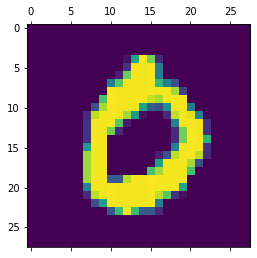

In [17]:
# show 3rd image from test data

plt.matshow(X_test[3])

In [18]:
# make prediction for test data and show 3rd
y_predicted = model.predict(X_test_flat)
y_predicted[3]

array([1.5605211e-02, 9.5079394e-14, 7.2581679e-07, 3.1398120e-08,
       2.6705671e-10, 1.4547289e-06, 2.6933824e-06, 1.2880388e-07,
       3.2027637e-07, 2.9861840e-07], dtype=float32)

In [19]:
# show predicted 3rd label for 3rd digit

np.argmax(y_predicted[3])

0

In [20]:
# show some predicted labels

y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [21]:
# confusion matrix

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    5,   12,    2,    3,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  936,   14,    7,    5,   13,   10,   30,    5],
       [   2,    0,   22,  913,    1,   27,    3,    9,   23,   10],
       [   1,    2,    2,    1,  906,    0,   14,    4,    6,   46],
       [   7,    3,    3,   25,   10,  785,   18,    5,   27,    9],
       [   6,    3,    5,    1,    7,   11,  922,    1,    2,    0],
       [   1,    7,   25,    4,    9,    1,    0,  938,    0,   43],
       [   6,   10,    7,   13,   10,   32,   11,   10,  859,   16],
       [   9,    7,    2,    8,   21,    8,    0,   17,    4,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

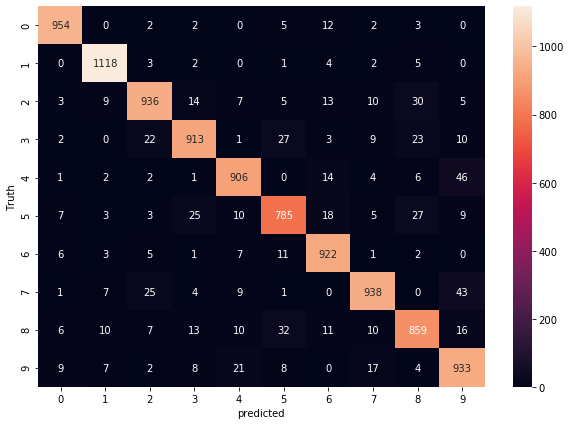

In [22]:
# show in color

import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot = True,fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [23]:
# add one more layer to model

model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.2952 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.1425 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.1019 - accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 2s 909us/step - loss: 0.0791 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.0634 - accuracy: 0.9814


In [24]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 715us/step - loss: 0.0877 - accuracy: 0.9744


[0.08769352734088898, 0.974399983882904]

### we can observe improved accuracy by adding a hidden layer

Text(69.0, 0.5, 'Truth')

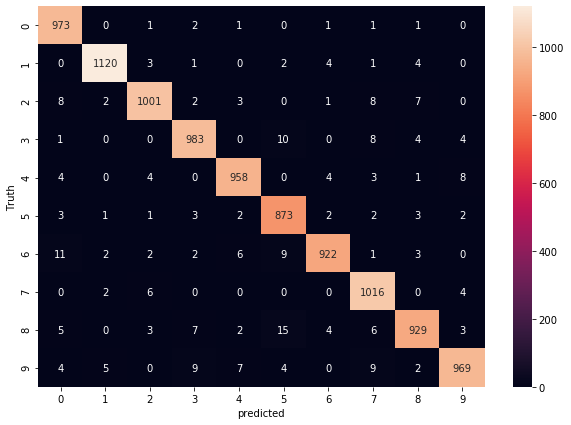

In [25]:
y_predicted = model.predict(X_test_flat)
y_predicted_label = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_label)
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot = True,fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
